In [51]:
! pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 991.0 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.3 MB 3.4 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 6.5 MB/s eta 0:00:00


In [52]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine.This dataset shows the quality of wine in terms of alcohol level,citric acid,chlorides,ph and sulphates present in it.Here our target variable is 'quality' and this model is a classification type model. 

In [3]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.tail(60)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1539,7.2,0.390,0.32,1.8,0.065,34.0,60.0,0.99714,3.46,0.78,9.90,5
1540,6.2,0.520,0.08,4.4,0.071,11.0,32.0,0.99646,3.56,0.63,11.60,6
1541,7.4,0.250,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6
1543,11.1,0.440,0.42,2.2,0.064,14.0,19.0,0.99758,3.25,0.57,10.40,6
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1545,6.5,0.630,0.33,1.8,0.059,16.0,28.0,0.99531,3.36,0.64,10.10,6
1546,7.0,0.570,0.02,2.0,0.072,17.0,26.0,0.99575,3.36,0.61,10.20,5
1547,6.3,0.600,0.10,1.6,0.048,12.0,26.0,0.99306,3.55,0.51,12.10,5
1548,11.2,0.400,0.50,2.0,0.099,19.0,50.0,0.99783,3.10,0.58,10.40,5


# Exploratory data analysis

In [5]:
df.shape

(1599, 12)

This dataset contains 1599 rows and 12 columns out of which 1 is our target variable and other 11 are independent variables.

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# checking the datasets of the columns
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [8]:
# checking the types of columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

This dataset contains 2 types of datatypes(int64,float64)

In [9]:
# checking the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

this dataset does not contain any missing values i.e.,all the values are present in the dataset.

In [10]:
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Description  of the dataset

In [11]:
# stastical summary of numerical columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


this gives the stastical information of the numerical data columns.The description looks perfect as there is no null or negative value present in this dataset.The counts of all the data are same so we can say that there is no missing value in the dataset.

1)The mean of fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol is more than the median.So these columns are rightly skewed.The density and the quality column have mean less than the median. So the data in these columns is left skewed.
2)We can see the mean median and standard deviation using the describe method.
3)we have observed that the mean for total sulphur dioxide is highest among all other attributes and the mean for citric acid is lowest among all the attriburtes.
4)there is a big gap betwwen 75% and max of the dataset.
5)there is a big gap between 75% and max of free sulphur dioxide.
6)there is a big difference between the 75% and max of total sulfur dioxide.
7)so by concluding we can say that there are outliers resent in the dataset.

# Data Visualization

<Axes: >

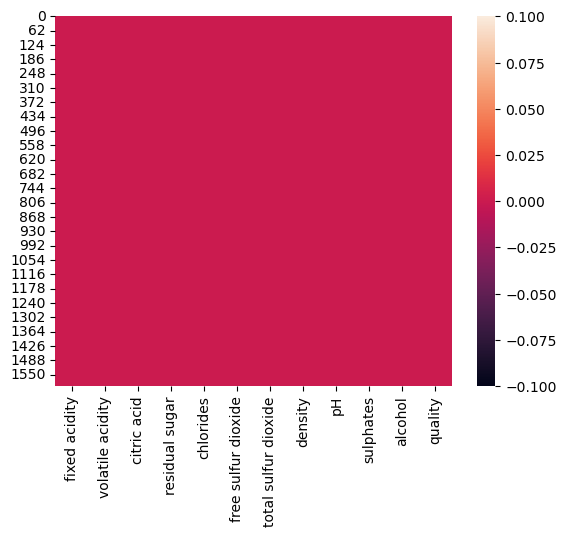

In [12]:
# visualization using heat map:
sns.heatmap(df.isnull())

By looking at this heat map we can clearly observe that there are no missing values present in the dataset.

In [13]:
# checking no of unique values in every column
df.nunique().to_frame("No Of Unique values")

,No Of Unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


we can observe that each columns consists of uique values.Here in this model our target variable is 'quality' and it contains 6 unique values.

In [14]:
# checking the unique values for quality column
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

we made an observation that there are 6 different types of qualities of red wine and the wine with quality higher than 7 ae considered as good wine and beow than 7 are considered as bad one.

#### visaulization 

Text(0, 0.5, 'count of rows')

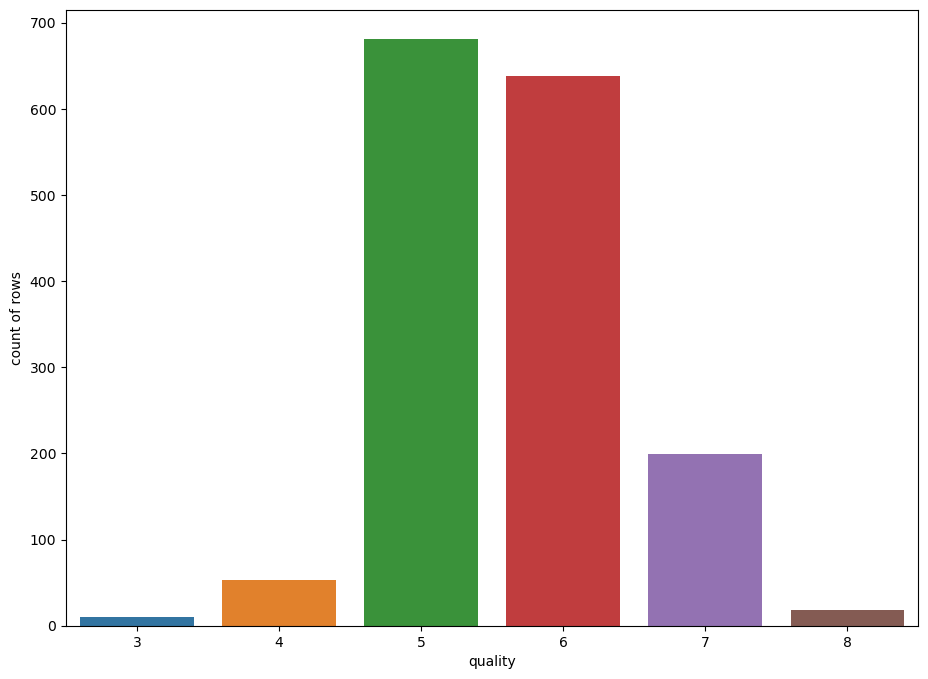

In [15]:
plt.figure(figsize=(11,8))
sns.countplot(x='quality',data=df)
plt.xlabel('quality')
plt.ylabel('count of rows')

we can observe that the qulity with number 5 has maximum number of output.

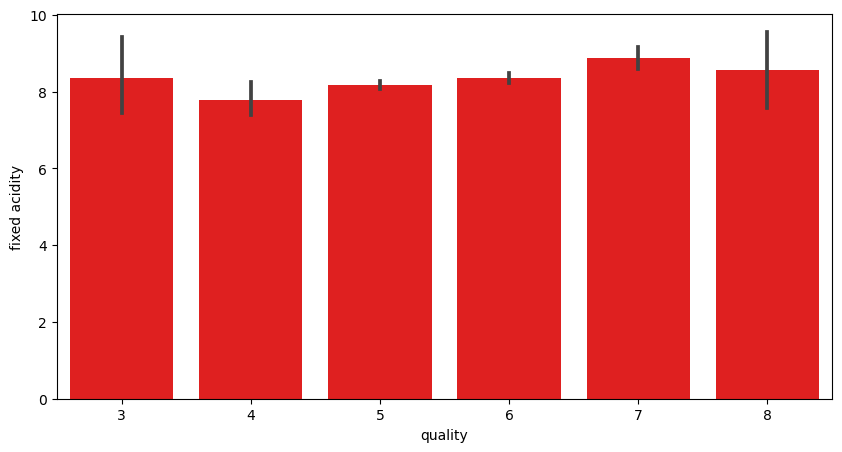

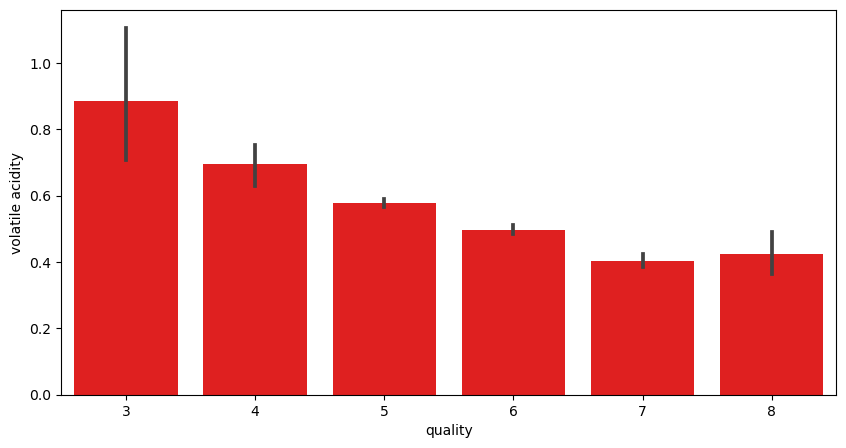

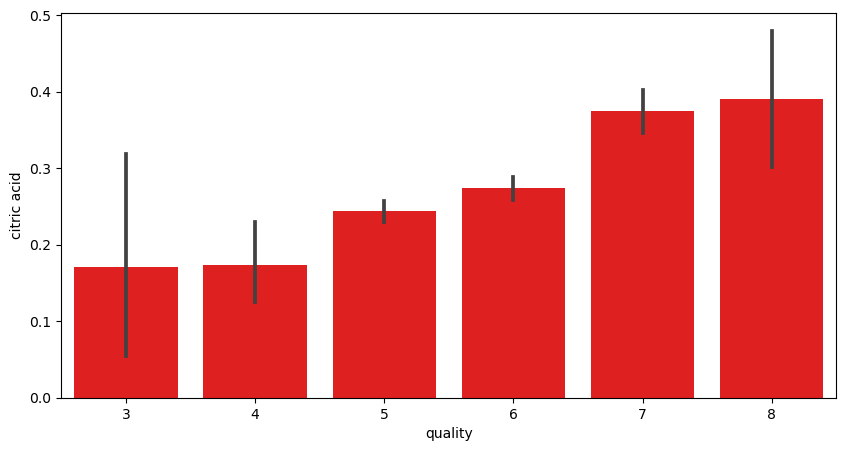

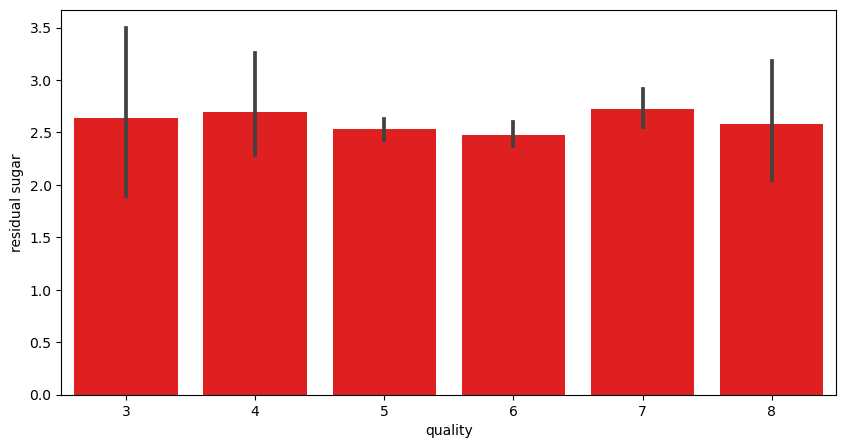

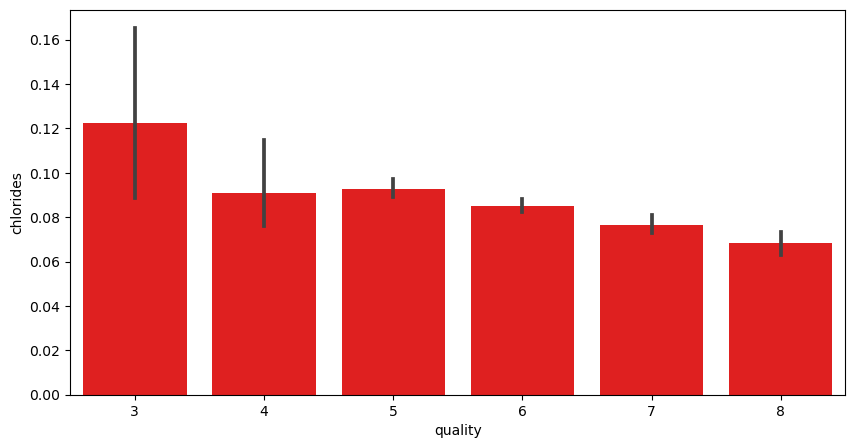

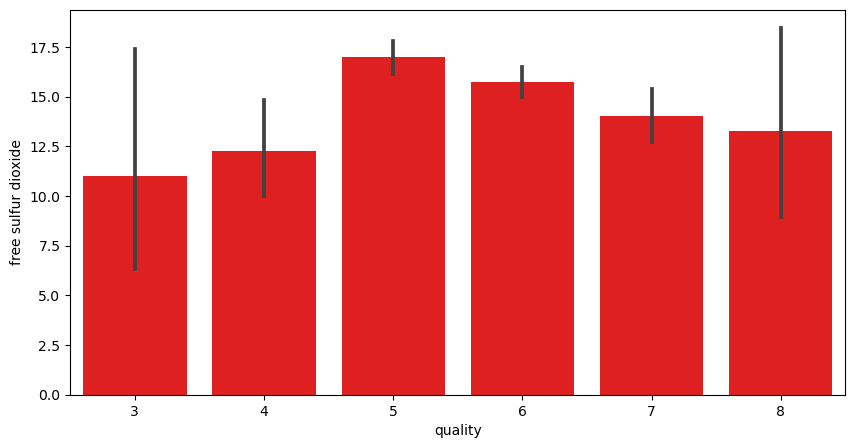

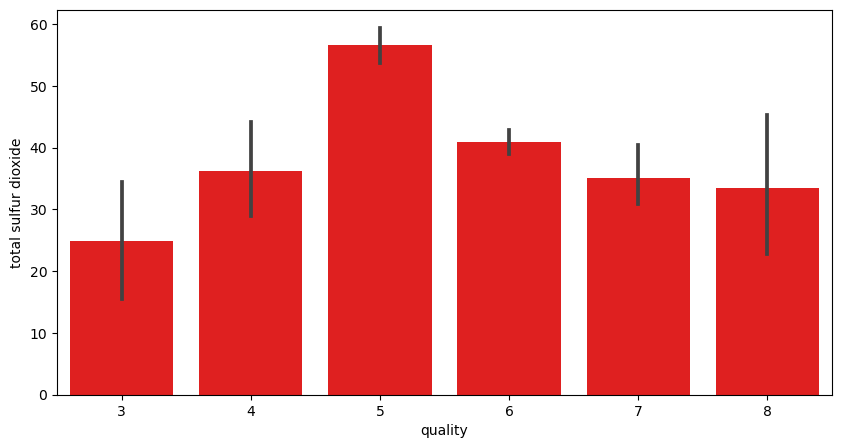

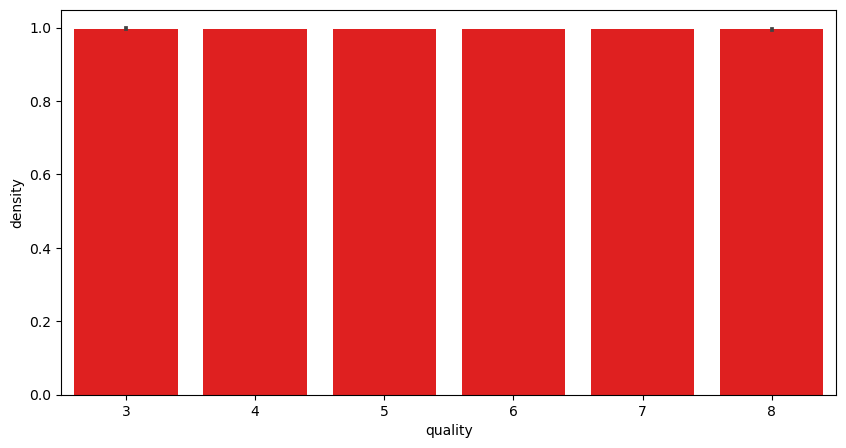

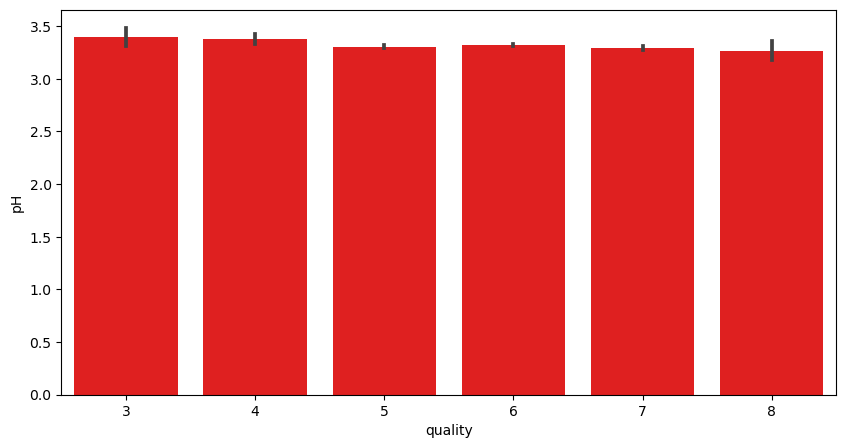

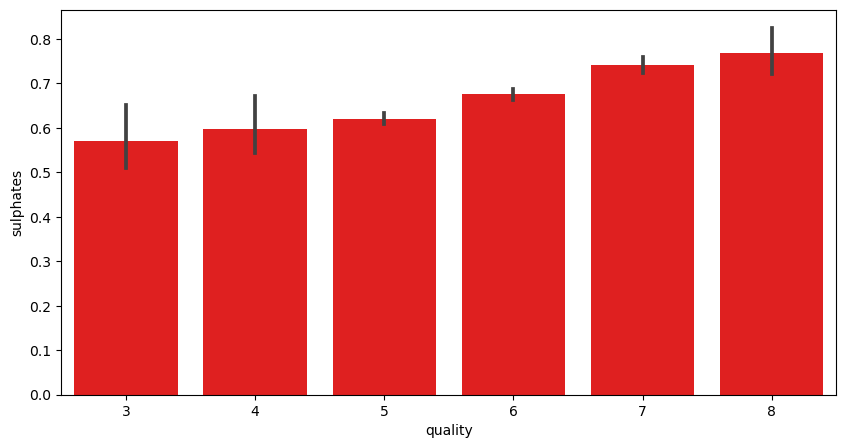

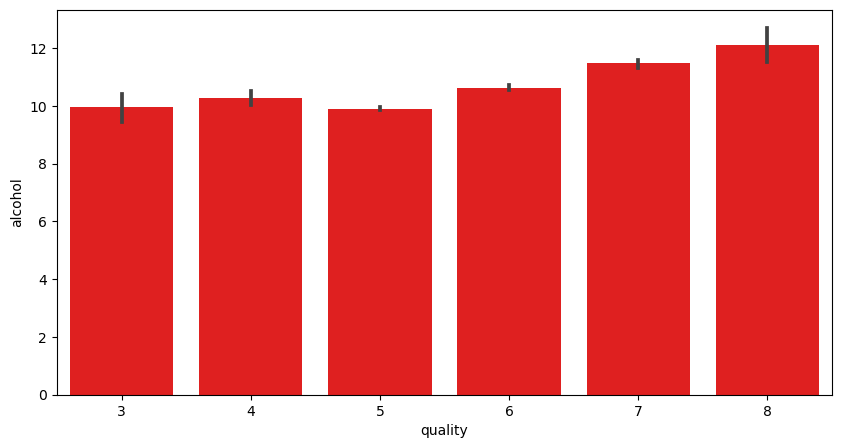

In [16]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="red")


here we have plotted bar plot of quality with respect to all other 11 columns
we have made following observations:
1 in volatile acidity vs qulity graph there is a decreasing trend 
2 in citric acid vs quality graph there is increasing trend 
3 in chlorides vs quality graph there is a decreasing trend
4 in sulphates vs quality graph there is an increasing trend
5 in alcohol vs quality graph there is an increasing trend
so we can  conclude that for getting good quality of wine , the factors like  citric acid , sulphates and alcohol play a major role. 

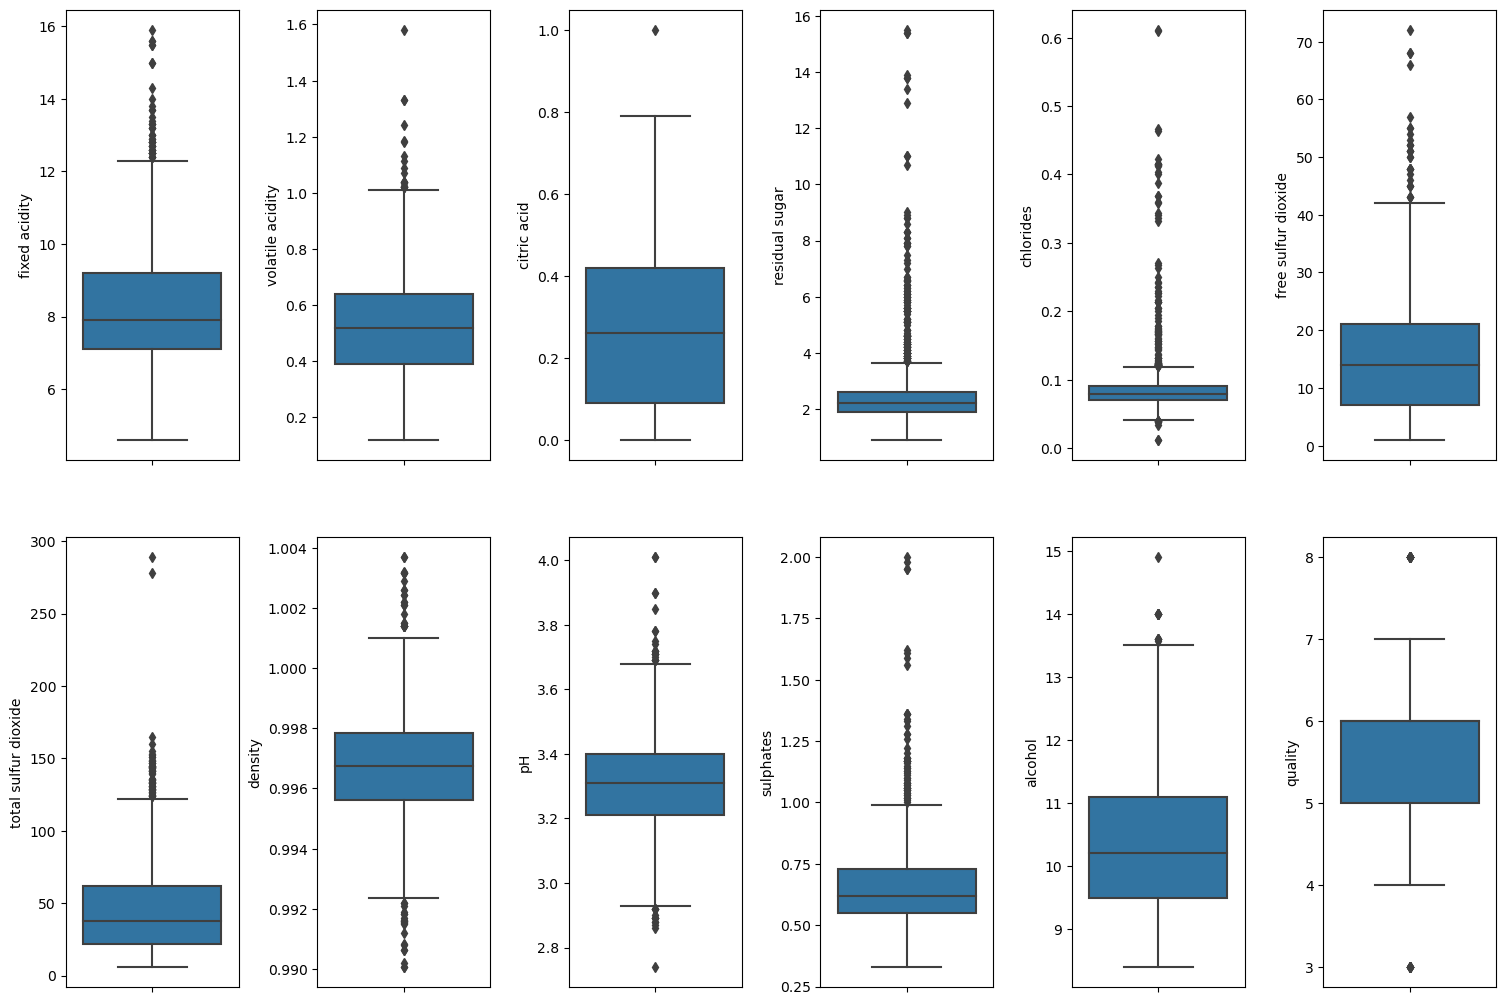

In [17]:
# plotting boxplot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

We can clearly see the outliers present in the data through boxlot. Now we will work upon to remove these oulliers.

### correlation through heatmap 

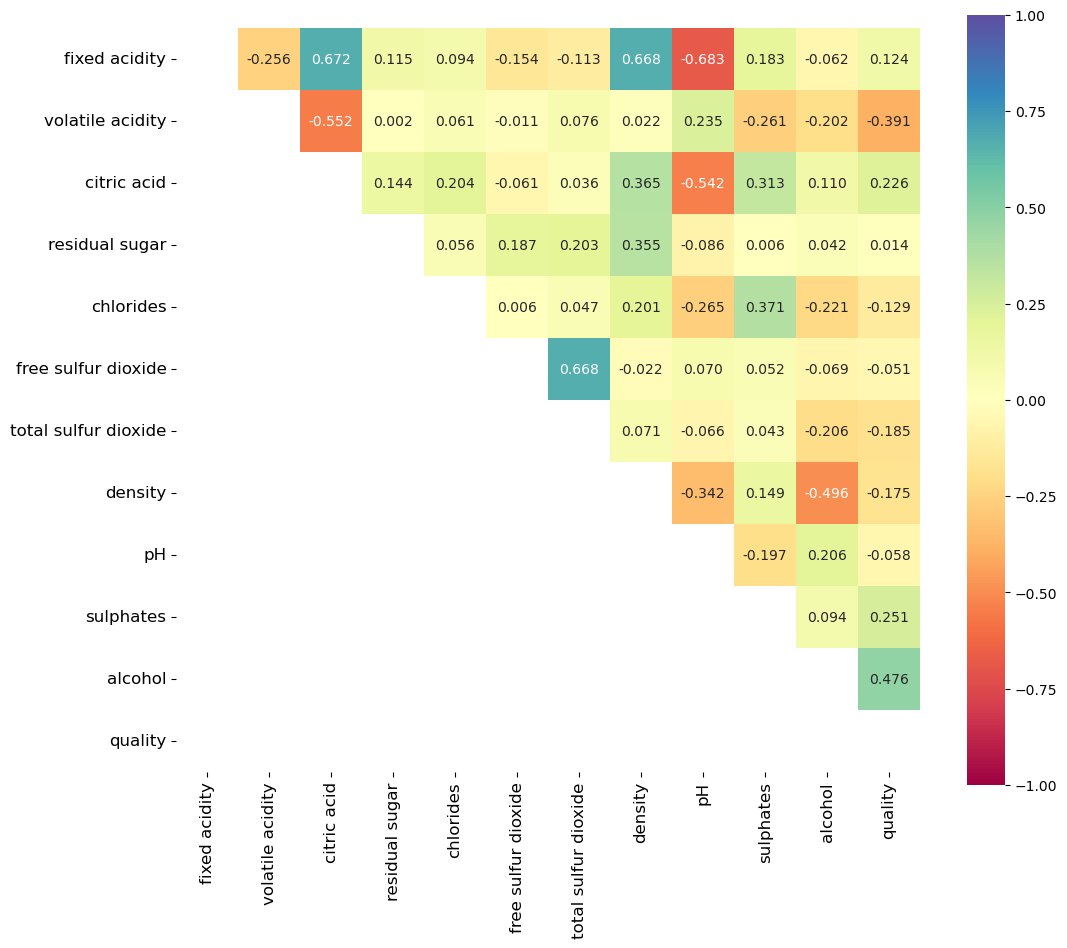

In [18]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We can  observe that in this heat map there are neagtive as well as postive correlation betwwen the target variables and other independent variables. Positive correlation +1 indicates a perfect positive correlation where both the variables move in the same direction and in negative correlation both the variables move in opposite direction.Zero correlation indicates that there is no relation between the variables.the quality column is least correlated with the residual sugar column nearly aprrox to 0.Similarly we can describe the correlaton of the quality with other columns as well.

# Dropping the column

In [19]:
df.drop('free sulfur dioxide',axis=1,inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


We have removed the free sulfur dioxide column as it creates a very less effect in measuring the quality of the red wine.So we can keep the total sulfur dioxide and remove the free sulfur dioxide.

# Removal of outlier

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


we have successfully removed the outliers in the range of +0.5 and -0.5 range of skewness.

In [21]:
df.shape

(1464, 11)

### splitting into feature and label 

In [22]:
X=df.drop('quality',axis=1)
Y=df['quality']

X represent the feature variables and Y represent the target variable in this dataset.

### in case of class imbalance 

In [23]:
Y.value_counts()

quality
5    624
6    590
7    187
4     47
8     16
Name: count, dtype: int64

We can see that different category of target variable occupies diiferent count.This indicates class imbalance and this need to be rectified using oversampling of the data.

In [24]:
!pip install scikit-learn
!pip install scikit-learn==1.2.2

In [25]:

from imblearn.over_sampling import SMOTE
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [26]:
Y.value_counts()

quality
5    624
6    624
7    624
4    624
8    624
Name: count, dtype: int64

after oversampling we can observe that the count of all the numbers is same now.

In [27]:
# justifying the target variable
Y

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

### Label binarization 

In [28]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y 

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

using the label binarization tehnique we have separted the different categories numbers as 0 and 1. 0 for bad quality and 1 for good quality

In [29]:
# disaplying other variables other than target variable
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,7.590032,0.596723,0.086182,2.214104,0.063091,49.103924,0.994001,3.469544,0.747635,12.719088
3116,10.161966,0.367934,0.494131,2.395035,0.069488,14.975174,0.996677,3.201241,0.660248,11.179345
3117,10.584731,0.353842,0.522315,2.556088,0.069890,15.780440,0.997088,3.160978,0.652196,11.038423
3118,8.449099,0.452144,0.420535,2.609820,0.077464,17.000000,0.993833,3.181697,0.793213,12.587508


# Training and testing data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

80% training data and 20% testing data

In [32]:
#training dataset 1st 5 row show
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
934,7.700000,0.580000,0.010000,1.800000,0.088000,18.000000,0.995680,3.320000,0.560000,10.500000
270,10.300000,0.430000,0.440000,2.400000,0.214000,12.000000,0.999400,3.190000,0.630000,9.500000
1468,8.006798,0.488182,0.429320,2.755938,0.079238,84.389845,0.997941,3.341441,0.688305,9.931368
1523,6.743713,0.550623,0.086563,4.071856,0.110283,30.312574,0.997006,3.458754,0.611569,10.312574
2922,8.912410,0.393089,0.483216,1.790127,0.070013,15.703806,0.994756,3.211975,0.730480,12.253171


In [33]:
#training dataset 1st 5 row show
Y_train.head()

934     1
270     0
1468    0
1523    0
2922    1
Name: quality, dtype: int64

In [33]:
#training dataset size
X_train.shape

(2496, 10)

In [34]:
#training dataset size
Y_train.shape

(2496,)

# Machine learning model 

In [35]:
# Classification Model Function

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 


def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

we have defined a class that will perform train-test split,training of machine learning model,predicting the accurate score and class_report and cross validating score and the result of differnce of accurate score and cross validation score.

In [36]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [37]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 90.22435897435898

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       391
           1       0.85      0.89      0.87       233

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 87.43589743589745

Accuracy Score - Cross Validation Score is 2.788461538461533


Created a logistic regression model and checked for it's evaluation metrices.

### Decision tree classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model=DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)

Accuracy Score: 93.75

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       391
           1       0.90      0.93      0.92       233

    accuracy                           0.94       624
   macro avg       0.93      0.94      0.93       624
weighted avg       0.94      0.94      0.94       624

Cross Validation Score: 87.91666666666667

Accuracy Score - Cross Validation Score is 5.833333333333329


Created a Decision Tree Classifier model and checked for it's evaluation metrices.

### Random Forest Classifier 

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model=RandomForestClassifier(max_depth=15,random_state=115)
classify(model,X,Y)

Accuracy Score: 96.15384615384616

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       391
           1       0.93      0.97      0.95       233

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 92.40384615384615

Accuracy Score - Cross Validation Score is 3.750000000000014


### ExtraTreeClassifier 

In [42]:
from sklearn.ensemble import ExtraTreesClassifier

In [43]:
model=ExtraTreesClassifier()
classify(model,X,Y)

Accuracy Score: 96.7948717948718

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       391
           1       0.93      0.98      0.96       233

    accuracy                           0.97       624
   macro avg       0.96      0.97      0.97       624
weighted avg       0.97      0.97      0.97       624

Cross Validation Score: 93.58974358974359

Accuracy Score - Cross Validation Score is 3.2051282051282044


We have created an ExtraTreeClassifier model and checked for it's evaluation metrices.

In [44]:
# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 88.30128205128204

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       391
           1       0.84      0.85      0.85       233

    accuracy                           0.88       624
   macro avg       0.87      0.88      0.88       624
weighted avg       0.88      0.88      0.88       624

Cross Validation Score: 83.62179487179488

Accuracy Score - Cross Validation Score is 4.679487179487168


In [45]:
# Support Vector Classifier
from sklearn.svm import SVC
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 90.06410256410257

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       391
           1       0.86      0.88      0.87       233

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.89       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 86.69871794871794

Accuracy Score - Cross Validation Score is 3.3653846153846274


### Hyperparameter tuning on the best ML model

We have selected SVM classifier as the best model

In [46]:
from sklearn.model_selection import GridSearchCV 
parameter={'kernel':['poly','sigmoid','rbf'],
          'gamma':['scale','auto'],
           'shrinking':[True,False],
          'random_state':[21,42,104],
          'probability':[True,False],
          'decision_function_shape':['ovo','ovr'],
          'verbose':[True,False]}

In [47]:
GSCV=GridSearchCV(SVC(),parameter,cv=5)

using grid search CV method for hyperparameter tuning.

In [50]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 83.17307692307693


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# Saving the model

In [53]:
import joblib
filename = "FinalModel_3.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_3.pkl']

Finally I am saving my best classification model using the joblib library.